# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [2]:
# read datasets
df = pd.read_csv('df_cleaned.csv')
genre_df = pd.read_csv('genre_df_cleaned.csv')
year_df = pd.read_csv('year_df_cleaned.csv')
df_w_genre = pd.read_csv('df_w_genre_cleaned.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


In [4]:
genre_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,other,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [5]:
year_df.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [6]:
df_w_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,other,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,other,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,other,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,other,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


# Distribution of Numeric Features

Duration column is in milliseconds, it is a very large scale and decreases interpretability, as we normally preceive the length of songs in minutes. Let's convert its unit to minute.

In [7]:
# get data frames need to be converted
duration_dfs = [df,genre_df,df_w_genre]

for i in duration_dfs:
    i['duration'] = round(i['duration_ms']/60000,2)
    
    # drop original
    i.drop(columns='duration_ms',inplace=True)

In [8]:
# get numeric features
num_features = df.select_dtypes('number').columns
num_features

Index(['valence', 'year', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'duration'],
      dtype='object')

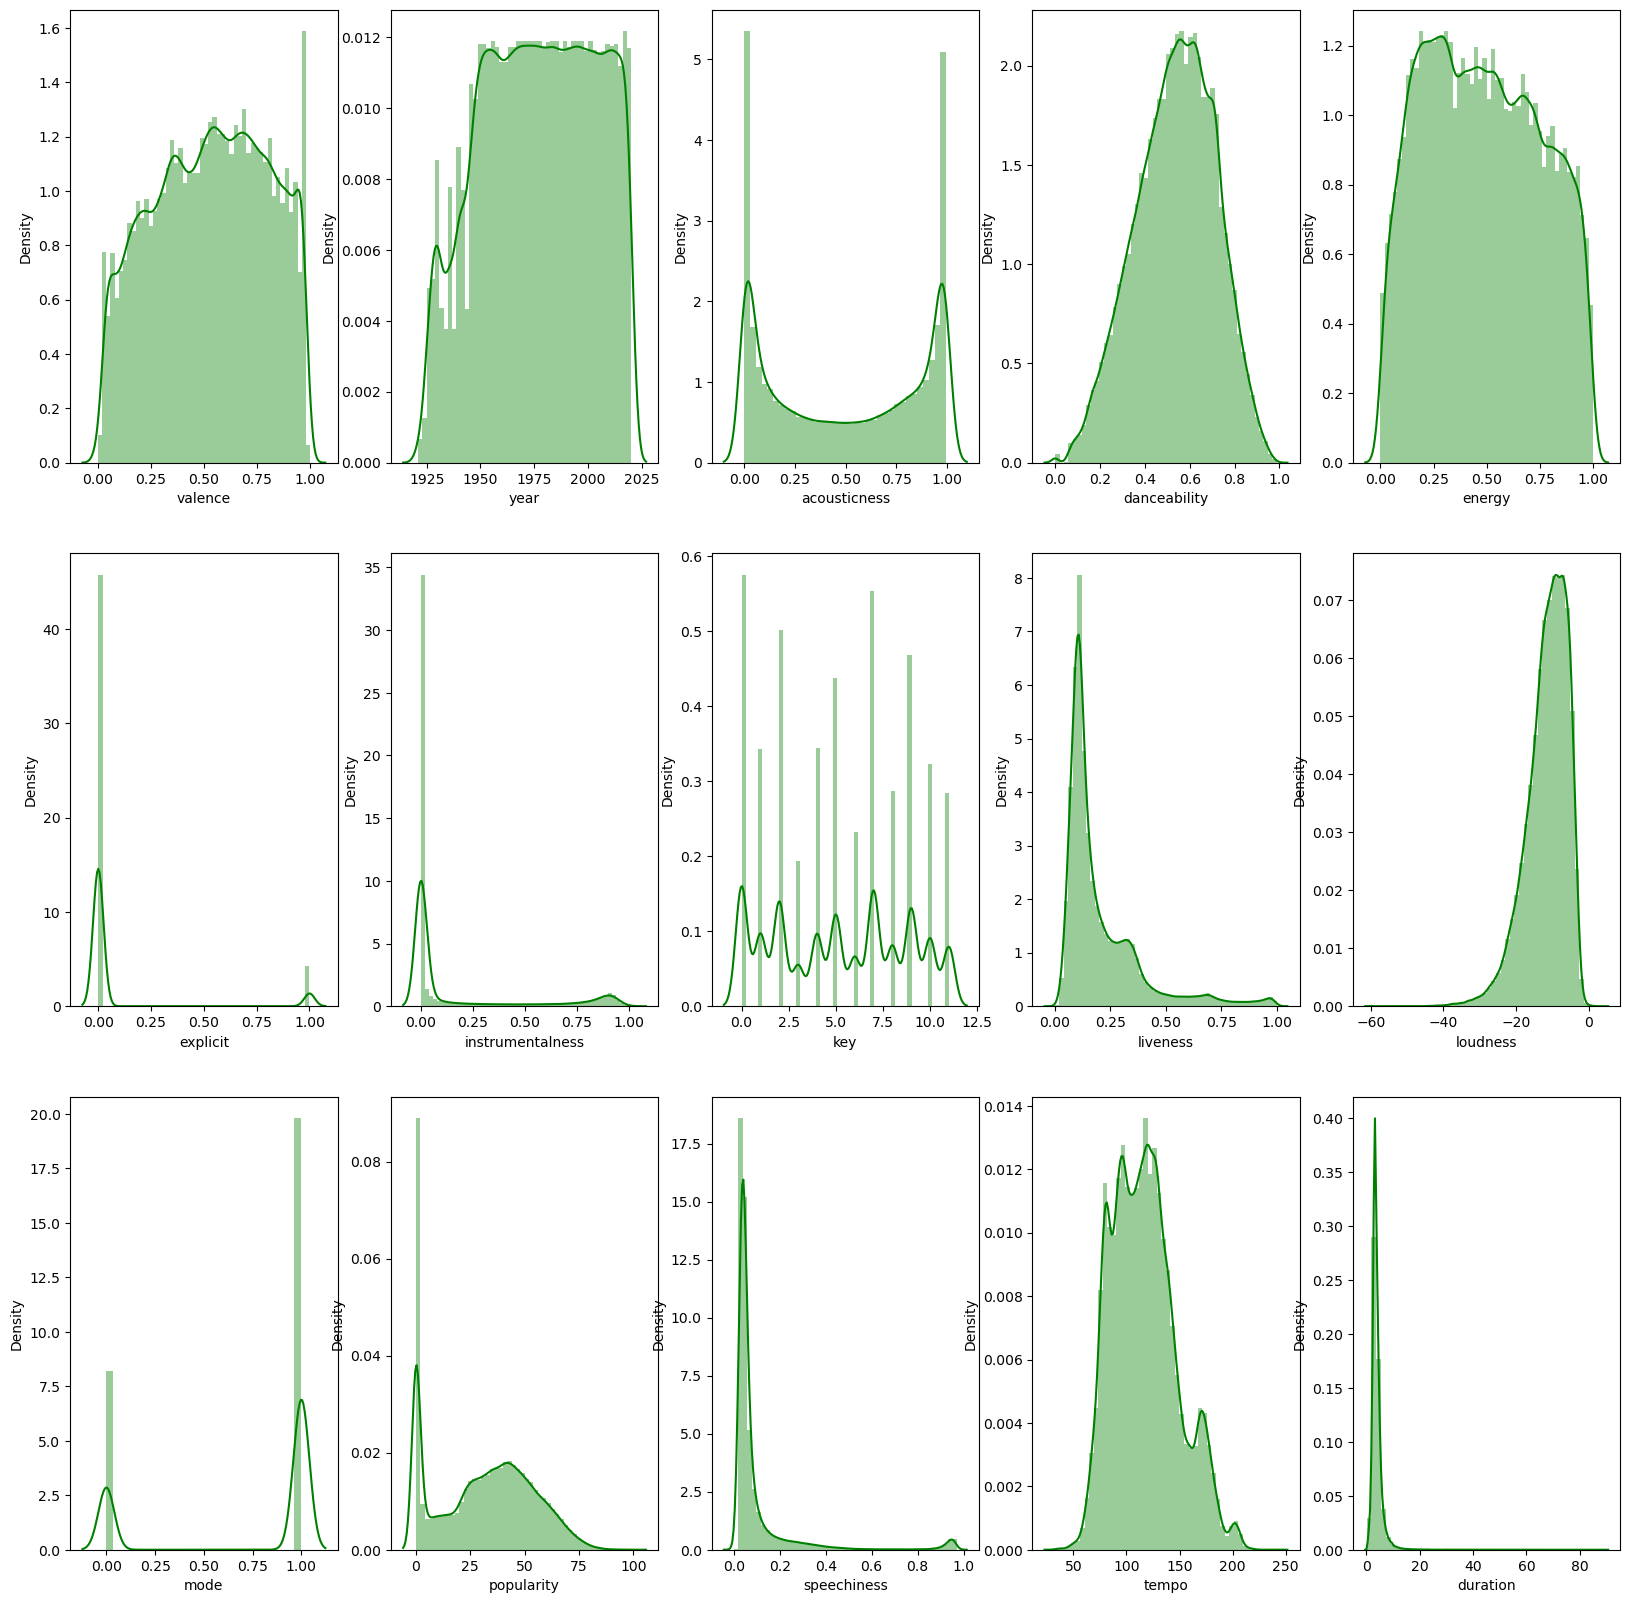

In [9]:
# visualize the numeric features in subplots
plt.subplots(3,5,figsize=(20,20))

for i, col in enumerate(num_features):
    
    plt.subplot(3,5,i+1)
    
    sns.distplot(df[col],color='green')
    
plt.show()

# Correlations

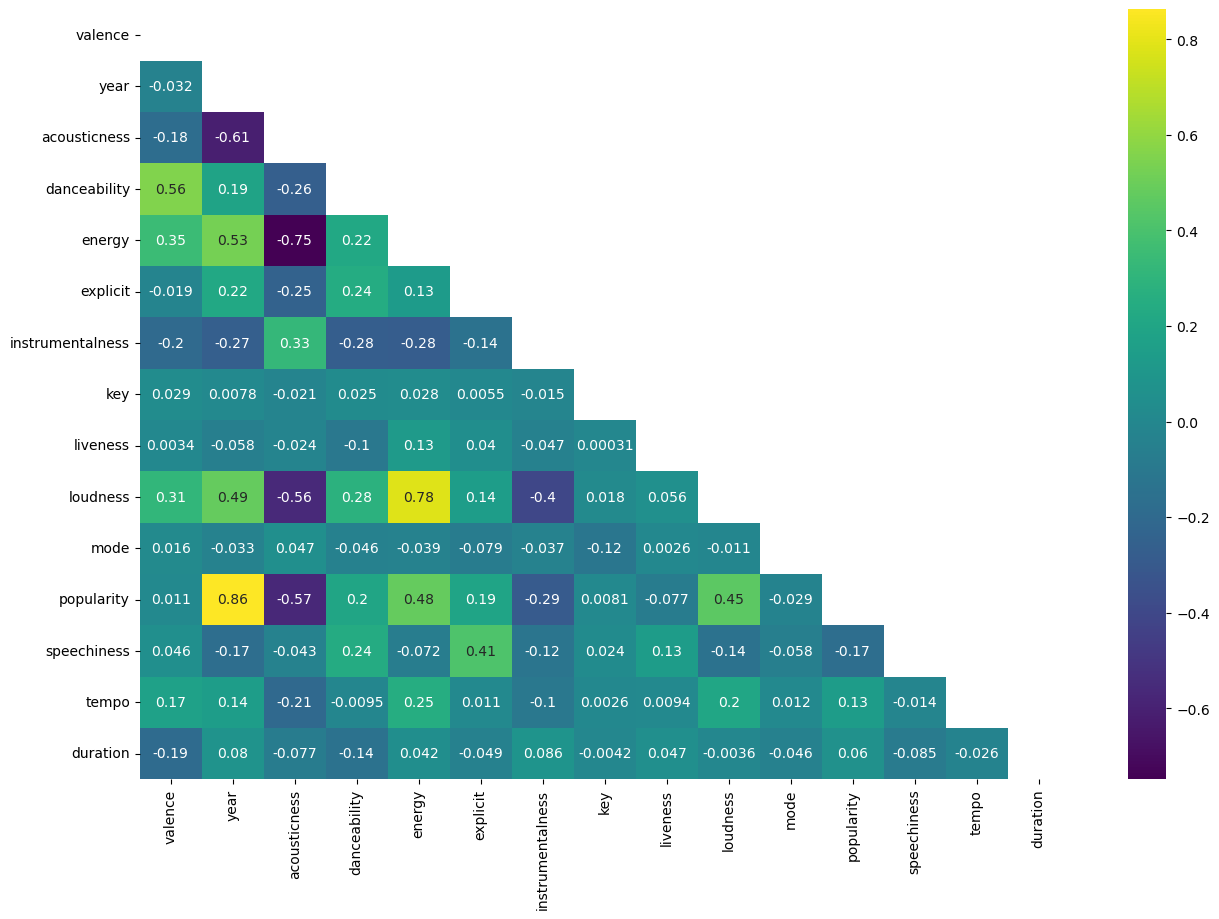

In [10]:
# heatmap of correlations of the numeric features
plt.figure(figsize=(15,10))

corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='viridis')
style.use('fast')
plt.show()

In [11]:
# calculate the pearson matrix
pm = df.corr(method='pearson')

# select target feature 
correlations = pm['popularity']

# sort the correlations
sorted_correlations = correlations.sort_values(ascending=False)

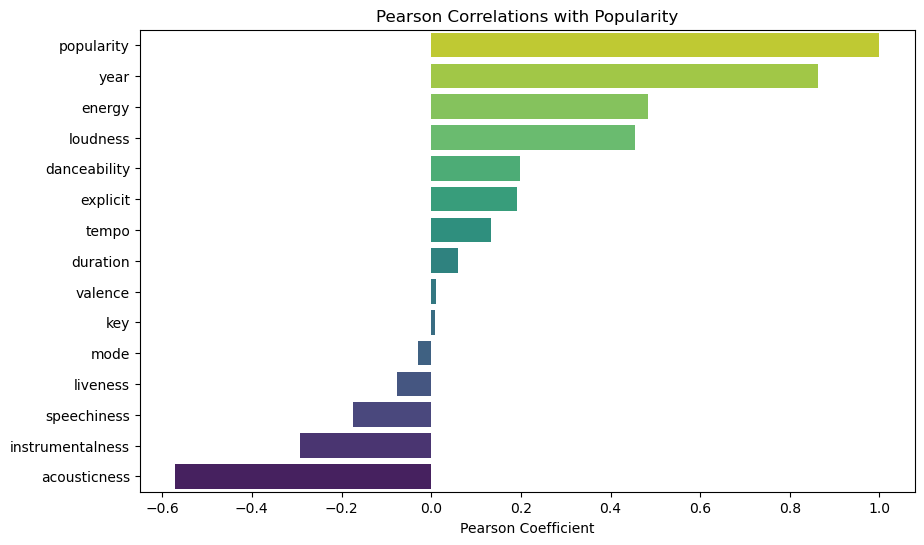

In [12]:
# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis_r')
plt.xlabel('Pearson Coefficient')
plt.title('Pearson Correlations with Popularity')
plt.show()

Frome above charts, we can derive that some attributes have significant impacts on the popularity of a song:

- Songs that were released recently are more popular. This makes sense, people prefer recent trendy songs. Vice versa, songwriters and producers often aim to create music that aligns with current trends. 
-  Energy and loudness moderately correlates to the popularity. Songs with higher energy levels and loudness are often associated with excitement, enthusiasm, and liveliness. This can be confirmed in the heatmap, energy and loudness have positive correlation with valence. Also, recent releases tend to be higher in energy and loudness.
- Acousticness and instrumentalness have negative relationships with popularity. Listerns nowadays expect music to include electronic or synthetic elements that provide a modern and energetic feel. Songs with high acousticness may not meet these expectations, leading to a disconnect with the preferences of those audiences.

# Music Development over Time

Typically, music trends, innovations. and cultural shifts occur over the course of a decade. For example, different music genres, production techniques, and societal influences tend to dominate a particular decade. 

I will group the tracks by the decade they were released in, it allows for straightforward comparison between different decades, and will facilitate trend analysis and understanding how musics evolved over time.

In [13]:
# get decades of each track
df['decade'] = df['year'].apply(lambda x: f'{(x//10*10)}s')

# check
df['decade'].value_counts()

1970s    19993
1990s    19897
1980s    19845
1950s    19805
2010s    19757
2000s    19642
1960s    19549
1940s    15073
1930s     9545
1920s     4990
2020s     1992
Name: decade, dtype: int64

In [14]:
# note that loudness and popularity are on higer scale, let's bring them to the scale between 0 and 1
# using MinMax scaler to transform
feature_to_transform = ['loudness', 'popularity']

# instantiate scaler
scaler = MinMaxScaler()

# fit transform
df[feature_to_transform] = scaler.fit_transform(df[feature_to_transform])

In [15]:
# calculate the average of the attributes by decade
year_grouped = df.groupby('decade')['valence', 'acousticness', 'danceability', 
                                    'energy', 'explicit','instrumentalness', 
                                    'loudness', 'mode', 'popularity','speechiness'].mean()
year_grouped

,valence,acousticness,danceability,energy,explicit,instrumentalness,loudness,mode,popularity,speechiness
decade,,,,,,,,,,
1920s,0.550604,0.796397,0.593447,0.238120,0.137275,0.363424,0.680594,0.695992,0.013399,0.298229
1930s,0.567818,0.867654,0.541617,0.286637,0.061917,0.276783,0.716998,0.693243,0.025343,0.204118
1940s,0.491189,0.869301,0.475289,0.256449,0.072514,0.358815,0.700842,0.701917,0.019136,0.155857
1950s,0.479127,0.840056,0.477122,0.286949,0.007776,0.247866,0.709034,0.710831,0.107158,0.093672
1960s,0.551939,0.624013,0.494697,0.414520,0.000563,0.157578,0.741105,0.753952,0.265517,0.057731
1970s,0.585079,0.400191,0.524945,0.533688,0.003551,0.115987,0.760694,0.743110,0.350579,0.059770
1980s,0.564437,0.298682,0.546421,0.594670,0.023230,0.122268,0.763802,0.709851,0.375254,0.062026
1990s,0.545045,0.307595,0.566132,0.585997,0.115143,0.109766,0.782943,0.723124,0.441941,0.080525
2000s,0.530306,0.269748,0.574144,0.651595,0.141330,0.083821,0.822150,0.685572,0.497324,0.087729


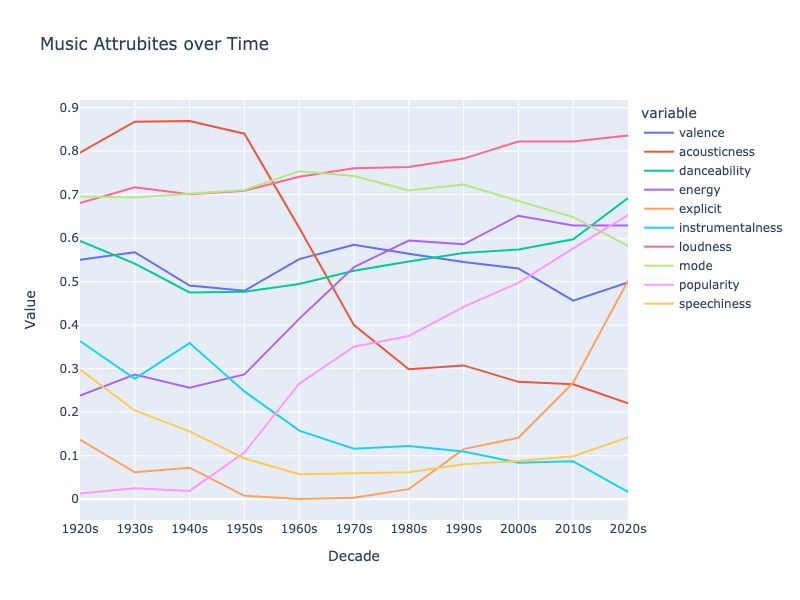

In [16]:
# making two separate plots for the features for a clear display

fig = px.line(year_grouped,
               x=year_grouped.index,
               y=year_grouped.columns,
               title='Music Attrubites over Time')

fig.update_layout(xaxis_title='Decade', 
                   yaxis_title='Value',
                   width=800,
                   height=600)

fig.show('png')

Some interestig trends and facts:
- To confirm our previous theory based on the correlations, recent releases are indeed more popular, the relationship is almost linear. However, the popularity of tracks from the 20s to 40s are indifferent.
- During the 20s and 40s, the recording technology was relatively primitive compared to today's standards. The technology favored acoustic instruments because they could produce a clear sound without the need for electronic amplification. The popular music at the time was heavily influenced by genres like jazz, blues, folk, and country. (Britannica, 2023)
- From  1950s to 1980s, music style transitioned to be dramatically less acoustic. One of the primary factors was the widespread adoption of electric instruments with the rise of rock 'n' roll in the 1950s, the genre created the power and energy of electirc guitars (the energy line experiences a sudden surge from the 50s to the 80s). In the 1970s and 1980s, synthesizers became increasingly popular. These electronic instruments allowed musicians to create entirely new sounds and genres, such as electronic music, synth-pop, and new wave.
- During the late 60s and early 70s, genres like disco or pop had more upbeat and high-valence music, while the later appearence of alternative or grunge in the 90s have a lower valence. Also the themes and lyrics of songs changed over the decades, more songs with melancholic themes emerged (eg. periods of social unrest or economic challenges), these songs tend to have lower valence
- Several aspects of music experienced abrupt change in their overall evolution during the 2010s. The rise of hip-hop or rap genres, often includes explicit language and higher lyrical content. Artists were increasingly inclined to express themselves freely in their music, addressing social and personal issues candidly. 

# Popular Genres

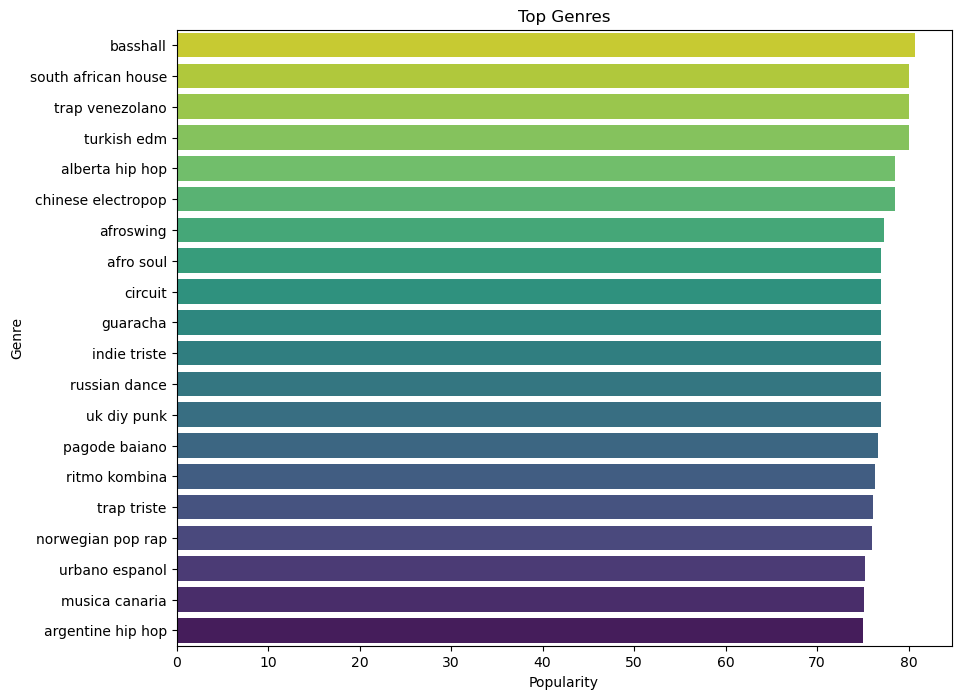

In [17]:
# get the top 10 genres
top_genres = genre_df.nlargest(20,'popularity')

# visualize
plt.figure(figsize=(10,8))

sns.barplot(top_genres,
           y='genres',
           x='popularity',
           palette='viridis_r',
           orient='h')

plt.title('Top Genres')
plt.xlabel('Popularity')
plt.ylabel('Genre')

plt.show()

In essence, the prevalence of beats and the incorporation of electronic and synthetic elements in the most popular genres are a testament to the ever-evolving nature of music. These genres continuously push the boundaries of sonic innovation, reflecting the dynamic interplay between technology, culture, and artistic creativity in the modern music industry.

# Top Tracks

In [18]:
df.groupby(['name','artists'])['popularity'].sum().reset_index().sort_values('popularity',ascending=False).head(20)

,name,artists,popularity
39710,Eye of the Tiger,Survivor,3.62
134764,Thriller,Michael Jackson,3.21
57626,I Ran (So Far Away),A Flock Of Seagulls,3.18
24561,Come As You Are,Nirvana,2.96
65839,Jingle Bell Rock,Bobby Helms,2.92
45888,Girls Just Want to Have Fun,Cyndi Lauper,2.89
33180,Don't Stop Believin',Journey,2.78
63971,It Was A Good Day,Ice Cube,2.74
87747,My Name Is,Eminem,2.73
102258,Promiscuous,"Nelly Furtado, Timbaland",2.72


Looks like some tracks were remastered or have different versions, let's check.

In [19]:
# look at Eye of the Tiger
df[df['name']=='Eye of the Tiger']

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration,decade
12018,0.552,1982,0.216,Survivor,0.815,0.438,0,0.000466,0,0.0787,0.712207,0,Eye of the Tiger,0.74,0.0346,108.965,4.06,1980s
12610,0.548,1985,0.132,Survivor,0.817,0.599,0,0.000311,0,0.0873,0.794785,0,Eye of the Tiger,0.77,0.0328,108.873,4.09,1980s
53962,0.563,2004,0.158,Survivor,0.823,0.563,0,0.000330,0,0.0861,0.780926,0,Eye of the Tiger,0.58,0.0318,108.860,4.09,2000s
89233,0.566,2006,0.146,Survivor,0.824,0.556,0,0.000394,0,0.0839,0.771889,0,Eye of the Tiger,0.50,0.0330,108.858,4.09,2000s
153921,0.556,2014,0.195,Survivor,0.806,0.599,0,0.000455,0,0.0837,0.792749,0,Eye of the Tiger,0.51,0.0323,109.016,4.07,2010s
168078,0.561,2010,0.236,Survivor,0.821,0.477,0,0.000522,0,0.0771,0.729058,0,Eye of the Tiger,0.52,0.0349,108.684,3.79,2010s


Indeed, there different versions of the same track, we will use average instead of sum to group tracks by their popularity instead.

In [20]:
top_tracks = df.groupby(['name','artists'])['popularity'].mean().reset_index().sort_values('popularity',ascending=False).head(20)
top_tracks

,name,artists,popularity
27919,Dakiti,"Bad Bunny, Jhay Cortez",1.00
85342,Mood (feat. iann dior),"24kGoldn, iann dior",0.99
15291,Blinding Lights,The Weeknd,0.96
145406,What You Know Bout Love,Pop Smoke,0.96
142511,WAP (feat. Megan Thee Stallion),"Cardi B, Megan Thee Stallion",0.96
153258,you broke me first,Tate McRae,0.95
53290,Holy (feat. Chance The Rapper),"Justin Bieber, Chance the Rapper",0.95
76364,Lonely (with benny blanco),"Justin Bieber, benny blanco",0.95
50853,Head & Heart (feat. MNEK),"Joel Corry, MNEK",0.94
105358,Relación - Remix,"Sech, Daddy Yankee, J Balvin, ROSALÍA, Farruko",0.94


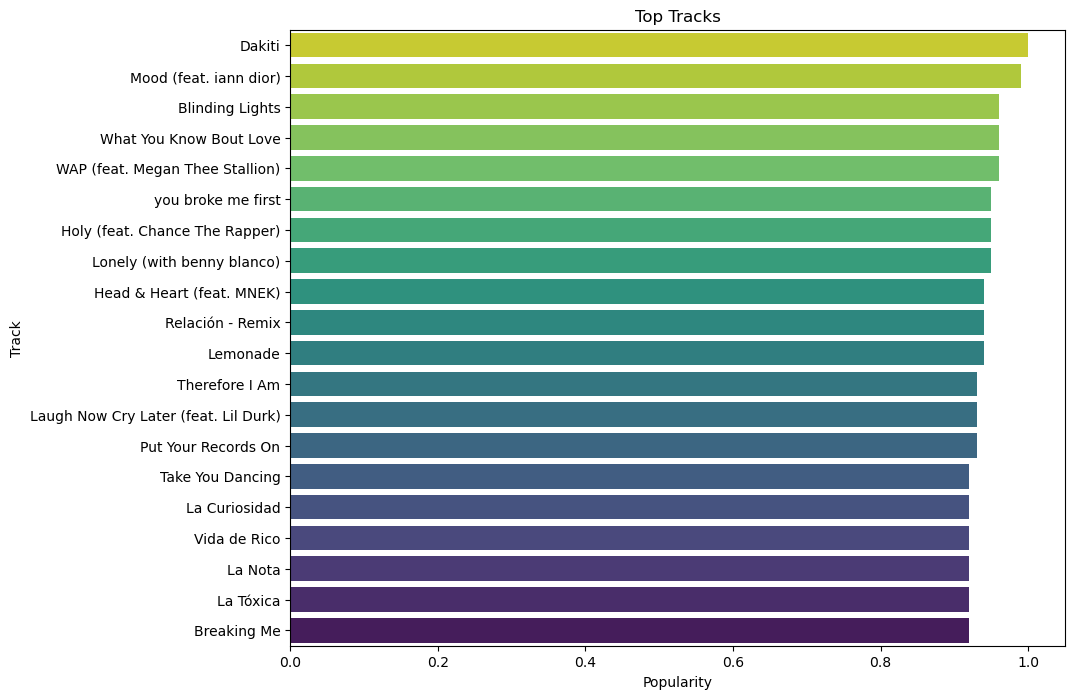

In [21]:
# visualize
plt.figure(figsize=(10,8))

sns.barplot(top_tracks,
           y='name',
           x='popularity',
           palette='viridis_r',
           orient='h')

plt.title('Top Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track')

plt.show()

Ah Daikiti, of course!

# Top Artists

In [22]:
df.head()

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration,decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,0.211,0,0.878000,10,0.665,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,0.341,0,0.000000,7,0.160,0.744797,1,Clancy Lowered the Boom,0.05,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,0.166,0,0.913000,3,0.101,0.707071,1,Gati Bali,0.05,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,0.309,0,0.000028,5,0.381,0.793736,1,Danny Boy,0.03,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,0.193,0,0.000002,3,0.229,0.781521,1,When Irish Eyes Are Smiling,0.02,0.0380,101.665,2.78,1920s


Some tracks have multiple artists, let's see who has the most appearances.

In [23]:
# use explode method to break down the artists into individual rows
df1 = df.assign(artists=df['artists'].str.split(', ')).explode('artists')

In [24]:
# look at the artists by the number of tracks they appeared in
df1['artists'].value_counts().head(20)

Francisco Canaro           2227
Эрнест Хемингуэй           1211
Эрих Мария Ремарк          1068
Frédéric Chopin             955
Wolfgang Amadeus Mozart     916
Johann Sebastian Bach       916
Ludwig van Beethoven        850
Frank Sinatra               784
Billie Holiday              688
Ignacio Corsini             628
Arturo Toscanini            596
Giuseppe Verdi              569
Johnny Cash                 565
Igor Stravinsky             556
New York Philharmonic       536
Ella Fitzgerald             522
Elvis Presley               518
Lata Mangeshkar             508
Bob Dylan                   485
The Rolling Stones          481
Name: artists, dtype: int64

For the most popular artists, I will compare them by the summing the popularity of their tracks.

In [25]:
# group artists by their popularity
top_artists = df.groupby('artists')['popularity'].sum().reset_index().sort_values('popularity',ascending=False).head(20)

top_artists

,artists,popularity
29185,The Beatles,192.18
10082,Frank Sinatra,179.87
8864,Elvis Presley,171.88
30295,The Rolling Stones,164.77
9770,Fleetwood Mac,156.40
4001,Bob Dylan,145.70
17822,Led Zeppelin,134.37
24340,Queen,132.02
15610,Johnny Cash,128.02
29178,The Beach Boys,122.16


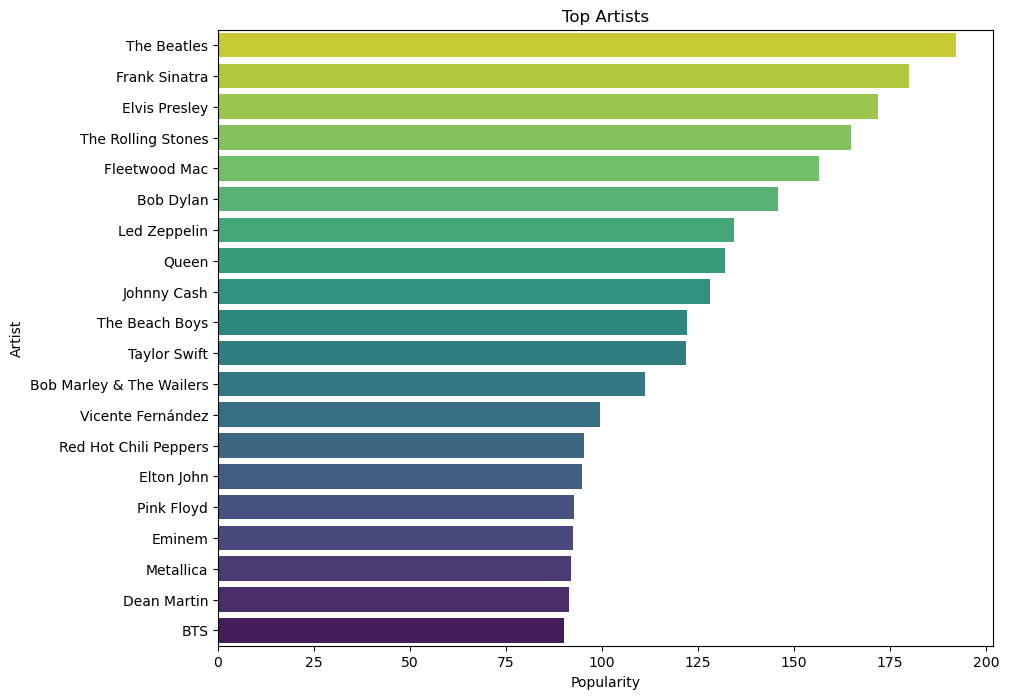

In [26]:
# visualize
plt.figure(figsize=(10,8))

sns.barplot(top_artists,
           y='artists',
           x='popularity',
           palette='viridis_r',
           orient='h')

plt.title('Top Artists')
plt.xlabel('Popularity')
plt.ylabel('Artist')

plt.show()

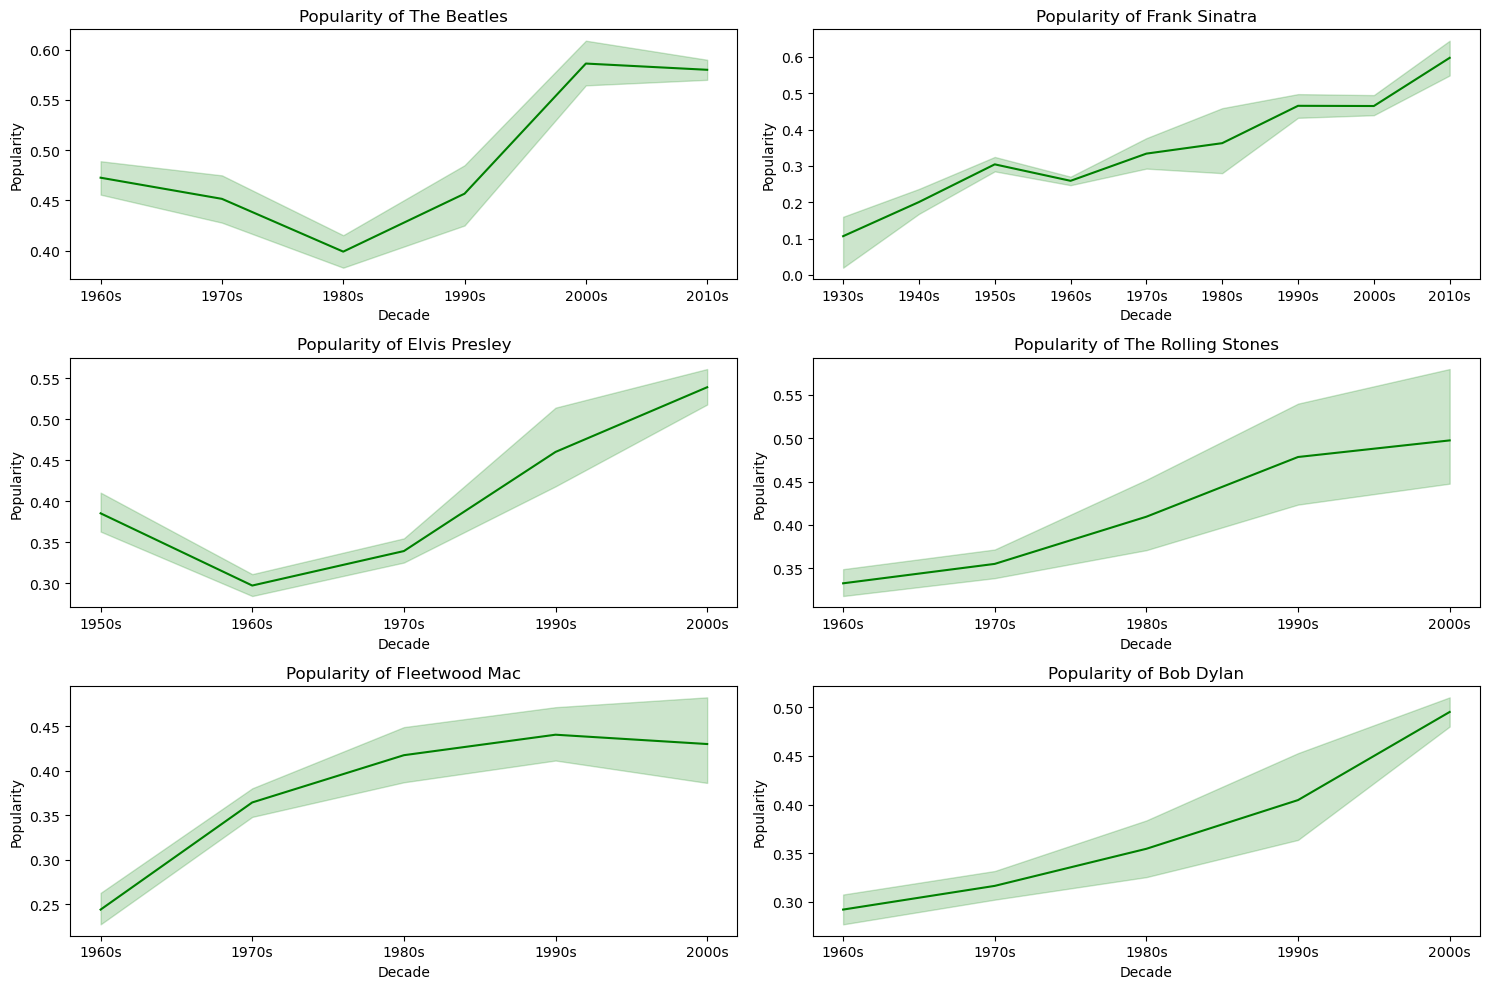

In [27]:
# get top 6 artists
top_six = ['The Beatles','Frank Sinatra','Elvis Presley','The Rolling Stones','Fleetwood Mac','Bob Dylan']

plt.subplots(3,2,figsize=(15,10))

for i, artist in enumerate(top_six):
    
    plt.subplot(3,2,i+1)
    
    sns.lineplot(df[df['artists']==artist].sort_values('decade'),
                x='decade',
                y='popularity',
                color='green')
    
    plt.title(f'Popularity of {artist}')
    plt.xlabel('Decade'),
    plt.ylabel('Popularity')
    
plt.tight_layout()
plt.show()

- The popularity of **The Beatles** decreased between late 1960s and 1970s, this could be caused by internal tensions and creative differences, which ultimately led to their breakup in 1970. This breakup marked the end of an era and left fans saddened. In the late 1970s and early 1980s, there was a resurgence of interest in The Beatles' music. This was partly fueled by nostalgia for the 1960s and the release of compilation albums and reissues of their classic albums. Younger generations also discovered their music during this period. Over time, The Beatles' influence on popular music became more widely recognized. They are often cited as one of the most influential and iconic bands in history, which further solidified their status.
- **Elvis Presley** also suffered a dip in his popularity as well. In the early 1960s, the music industry was undergoing significant changes, with the emergence of new music styles like the British Invasion (e.g., The Beatles) and the rise of Motown. These new genres and artists captured the attention of younger audiences, and Elvis' earlier rock and roll style became somewhat outdated. Also, Elvis focused heavily on his acting career during this period. While this brought him success in Hollywood, it diverted his attention from making new music and touring, which could have sustained his music career. Despite this decline in the 1960s, Elvis Presley's career saw a resurgence in the late 1960s with his "comeback special" and a return to live performances. He continued to record and perform until his passing in 1977, leaving a lasting legacy as one of the most influential musicians in the history of rock and roll.

# Other Attributes

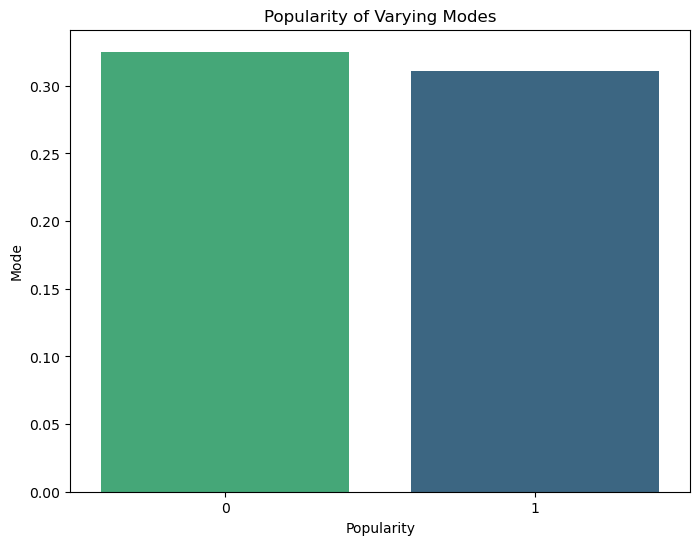

In [28]:
# mode
grouped_mode = df.groupby('mode')['popularity'].mean().reset_index()

# visualize
plt.figure(figsize=(8,6))

sns.barplot(grouped_mode,
           x='mode',
           y='popularity',
           palette='viridis_r',)

plt.title('Popularity of Varying Modes')
plt.xlabel('Popularity')
plt.ylabel('Mode')

plt.show()

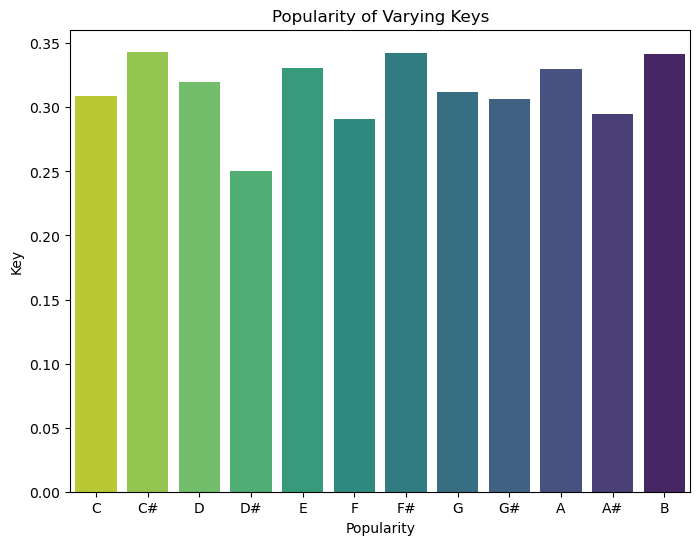

In [29]:
# key
grouped_key = df.groupby('key')['popularity'].mean().reset_index()

# visualize
plt.figure(figsize=(8,6))

sns.barplot(grouped_key,
           x='key',
           y='popularity',
           palette='viridis_r',)

plt.title('Popularity of Varying Keys')
plt.xlabel('Popularity')
plt.ylabel('Key')

# rename the number to corresponding key
keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
plt.gca().set_xticklabels(keys)
plt.show()

- Mode 0 (minor modality) is slighly higher in average popularity.
- C#, F#, and B are the most popular keys